<a href="https://colab.research.google.com/github/FaithKare/Hypothyrodism-Prediction-Analysis/blob/master/Faith_Wangari__Data_Science_week8_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the question 

## a) Specyfig the question for analysis 

The problem at hand is to create models that determine whether or not the patient's symptoms indicate that the patient has hypothyroidism or not.

## b) Specyfing the Metric of success 

This project will be successful when:

1)The most crucial and important features that affect Hypothyroidism are identified

2)Select a model with highest accuracy, lowest error and no overfitting

## c) Understanding the context 

Nairobi Hospital being a healthcare institution that is vital for the well-being of the Kenyan citizens should always ensure that they can increasingly provide higher healthcare standards to potential patients, that includes accurate diagnosis. Misdiagnosis leads to loss of money by patients, let alone the risk to their lives and wel-being. Therefore, an accurate model can greatly reduce said risk. This model shouldn't be prescriptive but act as a screen before the doctor comes in. It is imperative that this model is not only accurate but precise.

## d) Experminetal design 

Data Loading and exploration 

Data cleanig 

Exploratory data analysis 

    Univaraite , bivaiate and multivariate analysis

Impmenenting the solution by modelling 

Decison trees 

    Random trees , ADA Boosting, Gradient Boosting 

Support vector machine 

    Linear function kernel , Polynomial function kernel , Radial Basis,Function kernel 

   

## e) Data Relevance 

The data is relevant because it contains columns that are helpful in predicting whether a patient has hypothyroidism or not? For example, sex is a factor to consider according to this link https://www.medscape.com/answers/122393-11271/is-hypothyroidism-more-common-in-males-or-females#:~:text=Community%20studies%20use%20slightly%20different,8%20times%20higher%20in%20females.



In [ ]:
# importing relevant libraries 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



# Data Loading and exploration 

In [ ]:
# loading the dataset 
data = pd.read_csv("hypothyroid.csv")

# preview top of the dataset
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
# checking for number of rows and columns 
data.shape

(3163, 26)

In [ ]:
# checking general informtaio about the columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [ ]:
# brief decription of the columns 
data.describe(include = 'object')

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


# Data Cleaning 

In [ ]:
# creating a copy of the dataset for cleaning.
data_1 = data


In [ ]:
# checking for null values 
data_1.isnull().sum()
# there are no missing values since they have have been disguised as ?

# replacing the missing vaues ? with null
data_1 = data_1.replace(['?'], np.nan)

#% of nulls in data per columns
(data_1.isnull().sum()/len(data_1))*100

status                        0.000000
age                          14.100537
sex                           2.307936
on_thyroxine                  0.000000
query_on_thyroxine            0.000000
on_antithyroid_medication     0.000000
thyroid_surgery               0.000000
query_hypothyroid             0.000000
query_hyperthyroid            0.000000
pregnant                      0.000000
sick                          0.000000
tumor                         0.000000
lithium                       0.000000
goitre                        0.000000
TSH_measured                  0.000000
TSH                          14.796080
T3_measured                   0.000000
T3                           21.972811
TT4_measured                  0.000000
TT4                           7.872273
T4U_measured                  0.000000
T4U                           7.840658
FTI_measured                  0.000000
FTI                           7.809042
TBG_measured                  0.000000
TBG                      

In [ ]:
#changing the column datatypes
# Changing the columns dtypes so that we can impute them
# Creating two lists: An array of numerical columns and  of categorical columns

#categorical columns array
categorical_columns = ['sex', 'on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 
                       'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']

#numerical columns array 
numerical_columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI' , 'TBG']


# Using a conditional for loop to convert each columns into the right data types

for column in data_1.columns:
  if column in numerical_columns:
    data_1[column]= pd.to_numeric(data_1[column])
  
  else:
    data_1[column] = data_1[column].astype('category')
        
# checking the data types to confirm changes
data_1.dtypes


status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

In [ ]:
# drop the column TBG since most of the values are missing 
data_1 = data_1.drop(['TBG', 'TBG_measured'],axis = 1)

# replace the missing values in the sex column with the mode 
data_1['sex']= data_1['sex'].fillna(data_1['sex'].mode()[0])

# replace the missing values in the age column with the mean 
data_1['age']= data_1['age'].fillna(data_1['age'].mean())


# fiiling in the rest of the numerical columns with 0. 
# taking the assumption that the null values indicate the patient did not have that symptom 
#defining the array of numerical columns to use.
numerical_columns_2 = ['TSH','T3', 'TT4', 'T4U', 'FTI']
data_1[numerical_columns_2] = data_1[numerical_columns_2].fillna(0)

data_1.isnull().any()
# all the null values have been dealt with 

status                       False
age                          False
sex                          False
on_thyroxine                 False
query_on_thyroxine           False
on_antithyroid_medication    False
thyroid_surgery              False
query_hypothyroid            False
query_hyperthyroid           False
pregnant                     False
sick                         False
tumor                        False
lithium                      False
goitre                       False
TSH_measured                 False
TSH                          False
T3_measured                  False
T3                           False
TT4_measured                 False
TT4                          False
T4U_measured                 False
T4U                          False
FTI_measured                 False
FTI                          False
dtype: bool

In [ ]:
# checking for duplicates 
data_1.duplicated().sum()

# Removing duplicates
# Keeping every first data point of the duplicated datapoints
data_1.drop_duplicates(keep='first', inplace = True)

# Checking to confirm whether duplicates have been dropped
data_1.duplicated().any()

False

In [ ]:
# checking for anomalies 
Q1 = data_1.quantile(0.25)
Q3 = data_1.quantile(0.75)
IQR = Q3- Q1
IQR

age    26.00
TSH     1.80
T3      1.50
TT4    46.00
T4U     0.23
FTI    38.00
dtype: float64

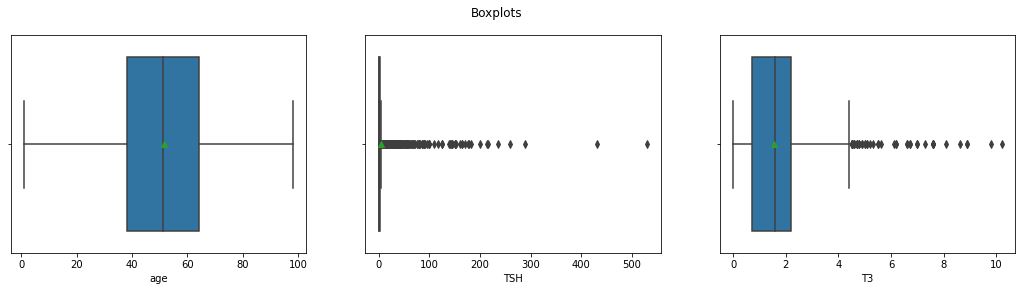

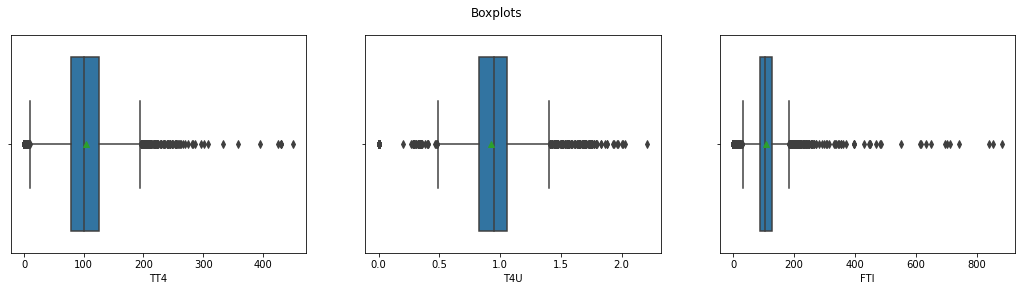

In [ ]:
# plotting the outliers 
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,4))
fig.suptitle('Boxplots')
sns.boxplot(x = data_1['age'], ax=ax1, showmeans = True)
sns.boxplot(x = data_1['TSH'], ax=ax2, showmeans = True)
sns.boxplot(x = data_1['T3'], ax=ax3, showmeans = True)

fig, (ax4, ax5,ax6) = plt.subplots(1,3, figsize=(18,4))
fig.suptitle('Boxplots')
sns.boxplot(x = data_1['TT4'], ax=ax4, showmeans = True)
sns.boxplot(x = data_1['T4U'], ax=ax5, showmeans = True)
sns.boxplot(x =data_1['FTI'], ax=ax6, showmeans = True)

# these outliers will not be removed in the analysis 

# Exploratory Data Analysis 

## a) Univariate Analysis 

In [ ]:
# frequency table of the dependent variable 'status'
# hypothryroid indicates the patient has the disease while negative indicates the patient does not have the disease. 

data_1.status.value_counts()

# the data has more patients who are negative of hypothrodism than those who are positive 

negative       2866
hypothyroid     141
Name: status, dtype: int64

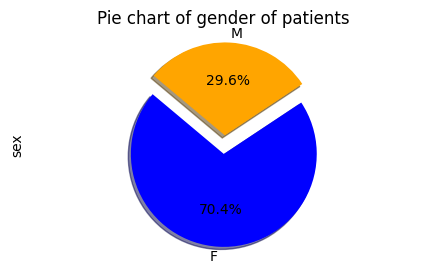

In [ ]:
# Pie Chart for sex of patients 
sex = data_1.sex.value_counts()
plt.figure(figsize= (5,3), dpi=100)

# Highlighting yes
explode = (0.2, 0)  
colors = ['blue', 'orange']

# Plotting our pie chart
sex.plot.pie(explode = explode, colors = colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Pie chart of gender of patients')
plt.show()

# the data has more feamle patients than males 
# this might be beacuse we filled thee missing valeus in the column sex with the mode which was F 

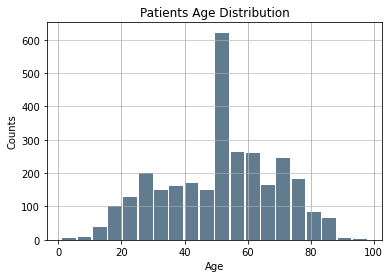

In [ ]:
#visualizing age dirstibution
size, scale = 1000, 10
age = data_1['age']

age.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Patients Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

# The visualization shows most patients in the datset are of about 50 years of age 

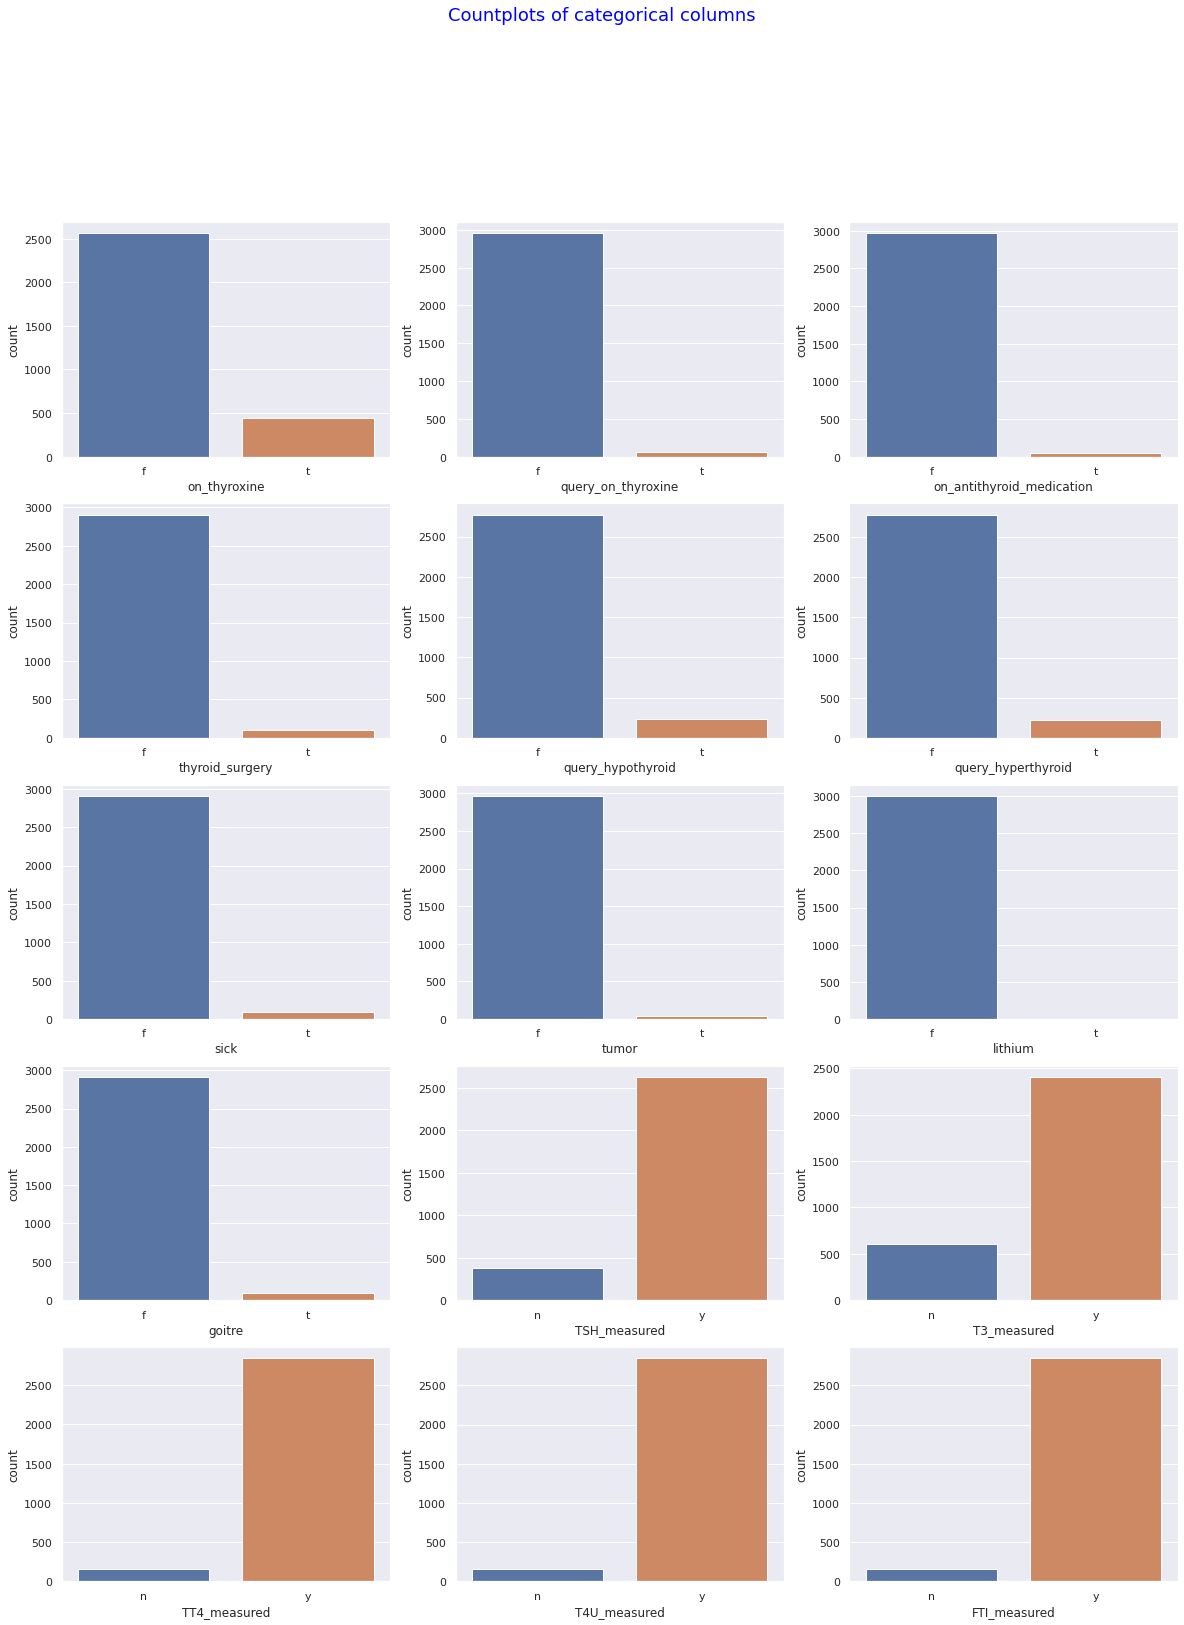

In [ ]:
# Countplot of categorical columns in the dataset
# creating a list of the categorical columns in the dataset

categorical_columns_1 =['on_thyroxine', 'query_on_thyroxine',
      'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
      'query_hyperthyroid', 'sick', 'tumor', 'lithium', 'goitre',
      'TSH_measured', 'T3_measured', 'TT4_measured',
      'T4U_measured', 'FTI_measured']


sns.set(style = 'darkgrid', context = 'notebook')
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 25))
plt.suptitle('Countplots of categorical columns', fontsize = 18, y = 1, color = 'blue')
for ax, data, column in zip(axes.flatten(), data_1, categorical_columns_1):
   sns.countplot(data_1[column], ax=ax)

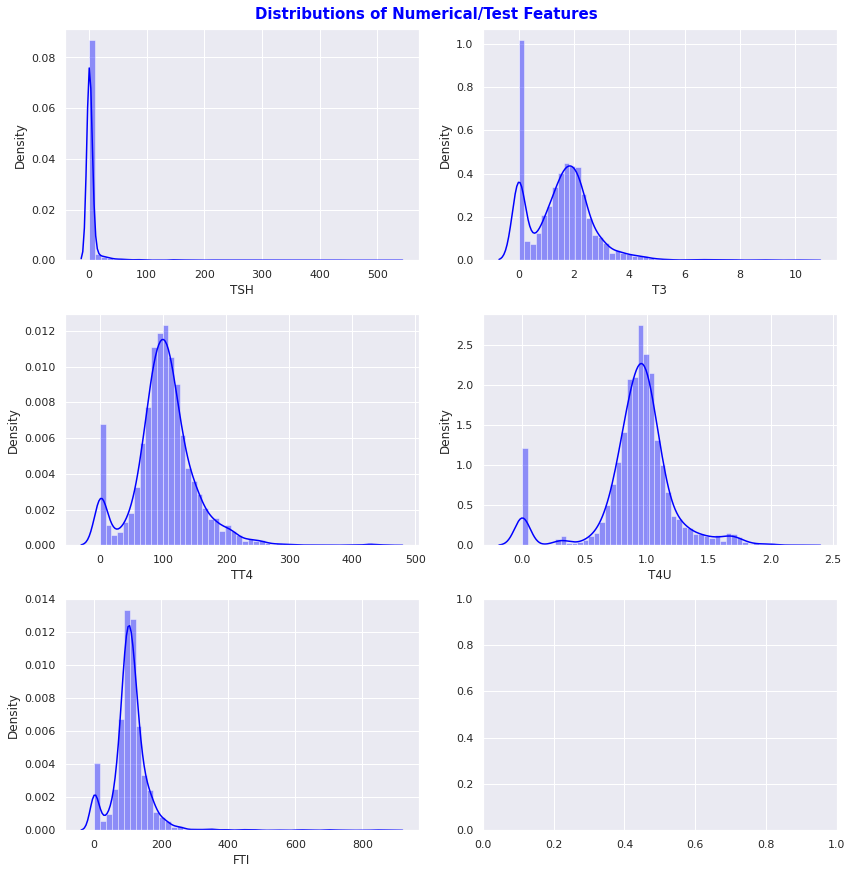

In [ ]:
# Histograms of the numerical columns
# these are columns represent the measures of the thyroid tests.

# First we create an array of the numerical columns
numerical_columns_3 = ['TSH','T3','TT4','T4U','FTI']

#visualizing the distributions using histograms
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize = (12, 12))
fig.suptitle('Distributions of Numerical/Test Features', y= 1.01, color = 'blue', fontsize = 15, weight = 'bold')

for ax, data, name in zip(axes.flatten(), data_1, numerical_columns_3):
  sns.distplot(data_1[name], ax = ax, kde = True, color = 'blue')
plt.tight_layout()
plt.show()

FTI, TT4 , TSH, T3 are right skewwed mailnly because of the outliers 

## b) Bivariate Analysis 

In [ ]:
# the correlations between the variables
corr = data_1.corr()
corr

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,0.008659,-0.094315,-0.026874,-0.066484,0.056143
TSH,0.008659,1.000000,-0.092994,-0.243451,0.089514,-0.200385
T3,-0.094315,-0.092994,1.000000,0.461689,0.415337,0.287902
TT4,-0.026874,-0.243451,0.461689,1.000000,0.543059,0.737680
T4U,-0.066484,0.089514,0.415337,0.543059,1.000000,0.094766
FTI,0.056143,-0.200385,0.287902,0.737680,0.094766,1.000000


It can be seen that TT4 and FTI are highly positively corelated, followed by TT4 and T4U which have an above than average positive corelation.

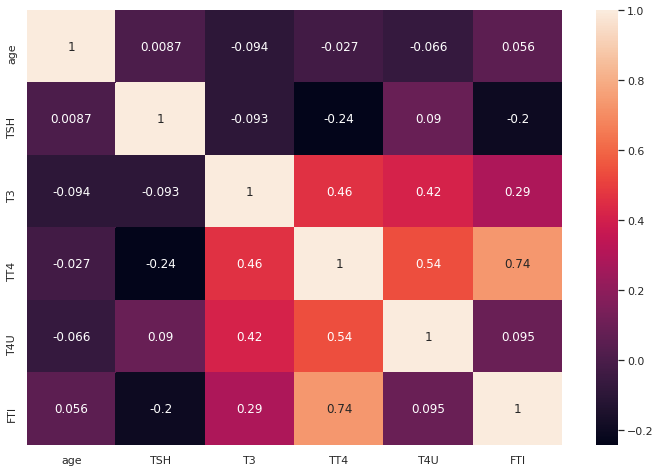

In [ ]:
# visualizing the correlation heatmap 
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True)
plt.show()

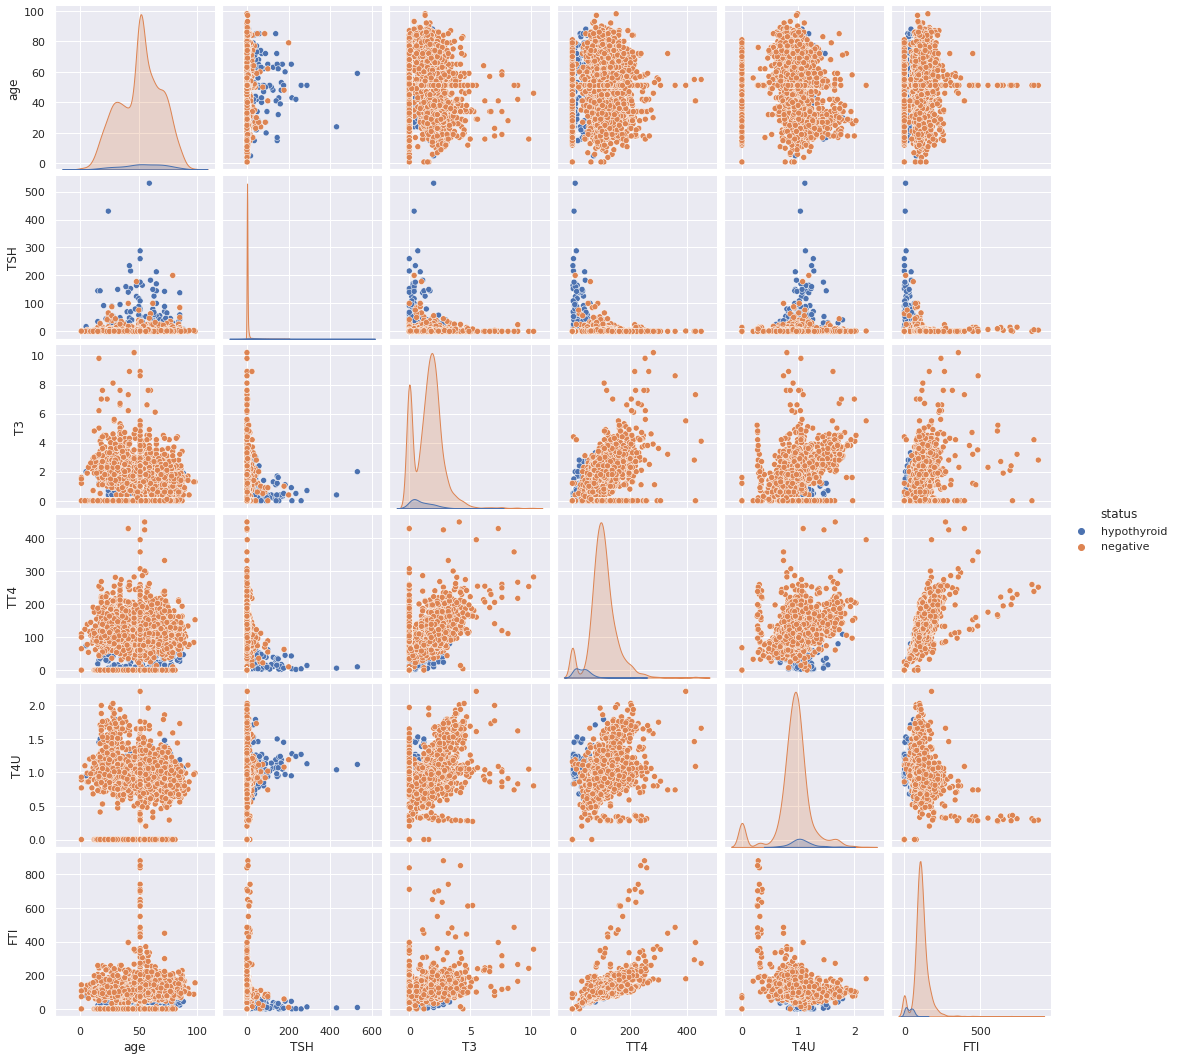

In [ ]:
# scatter pairplots of the variables 
sns.pairplot(data_1, hue='status')
plt.show()

# Feature Engineering with PCA

In [ ]:
data_1.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI'],
      dtype='object')

In [ ]:
# PCA analysis with One Hot Encoding

dummy_sex = pd.get_dummies(data_1['sex'], prefix = 'sex')
dummy_on_thyroxine = pd.get_dummies(data_1['on_thyroxine'], prefix = "on_thyroxine")
dummy_query_on_thyroxine = pd.get_dummies(data_1['query_on_thyroxine'], prefix = "query_on_thyroxine")
dummy_thyroid_surgery = pd.get_dummies(data_1['thyroid_surgery'], prefix = "thyroid_surgery")
dummy_pregnant = pd.get_dummies(data_1['pregnant'], prefix = "pregnant")
dummy_sick = pd.get_dummies(data_1['sick'], prefix = "sick")
dummy_tumor = pd.get_dummies(data_1['tumor'], prefix = "tumor")
dummy_TSH_measured = pd.get_dummies(data_1['TSH_measured'], prefix = 'TSH_measured')
dummy_FTI_measured = pd.get_dummies(data_1['FTI_measured'], prefix = "FTI_measured")
#dummy_ = pd.get_dummies(loans_df['education'], prefix = "Education")
#dummy_Self_Employed = pd.get_dummies(loans_df['selfemployed'], prefix = "Selfemployed")
#dummy_Property_Area = pd.get_dummies(loans_df['propertyarea'], prefix = "Property")
#dummy_Dependents = pd.get_dummies(loans_df['dependents'], prefix = "Dependents")
#dummy_Loan_status = pd.get_dummies(loans_df['loanstatus'], prefix = "Approve")

In [ ]:
# Creating a list of our dummy data

frames = [data_1,dummy_sex,dummy_on_thyroxine,dummy_query_on_thyroxine,dummy_thyroid_surgery,dummy_pregnant,dummy_sick,dummy_tumor, dummy_TSH_measured,dummy_FTI_measured]

In [ ]:
# Combining the dummy data with our dataframe

df_train = pd.concat(frames, axis = 1)
df_train.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,thyroid_surgery_f,thyroid_surgery_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,TSH_measured_n,TSH_measured_y,FTI_measured_n,FTI_measured_y
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1


In [ ]:
# Dropping of non-numeric columns and the columns we will not use in creating the model as part of pre-processing

df_train1 = df_train.drop(columns = ['sex','on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid','query_hyperthyroid', 'pregnant','sick','tumor','lithium','goitre','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured'])

In [ ]:
X=df_train1.drop(['status'],axis=1)
y= np.where(df_train1['status'] =='negative', 0,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [ ]:
explained_variance = pca.explained_variance_ratio_

explained_variance

array([7.77121586e-01, 1.11929113e-01, 6.73535942e-02, 4.32928268e-02,
       1.48824961e-04, 5.56299531e-05])

# Implemenenting The Solution 

# Decison Trees  

## a) Random Forests 

In [ ]:
# Selecting the independent variables and the target variable
X = data_1.drop('status', axis = 1)
y = np.where(data_1.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
# testing using 70% of the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

# Making predictions
y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
print(f' The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')


 The accuracy score is: 0.991140642303433 and the f1 score is 0.888888888888889


### Hyperparameter Tuning 

In [ ]:
# preview of the parameters to tune 
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Creating a dictionary of parameters to tune
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
params = {'n_estimators': [10, 20, 30, 40, 50, 60,70,80,90,100],
         'max_depth': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=10, shuffle=True)
model = RandomForestClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'max_depth': 5, 'n_estimators': 60}


In [ ]:
# Applying the best parameters to the model

X = data_1.drop('status', axis = 1)
y = np.where(data_1.status == 'hypothyroid', 1, 0)
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
rf = RandomForestClassifier(n_estimators= 60, max_depth=5, random_state = 0)
rf.fit(X_train, y_train)

# Making predictions
y_pred = rf.predict(X_test)


The accuracy score is: {0.9889258028792912}
The f1 score is: {0.8484848484848486}


In [ ]:
# And now we assess the errors
print('The accuracy score is:', {accuracy_score(y_test, y_pred)}) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.01107419712070875
Mean Squared Error: 0.01107419712070875
Root Mean Squared Error: 0.10523401123547818


after tuning the parameters the random forest model achieved an accuracy of 98% and MSE 0f 0.011. Which shows the overfitting got from the previous model was reduced

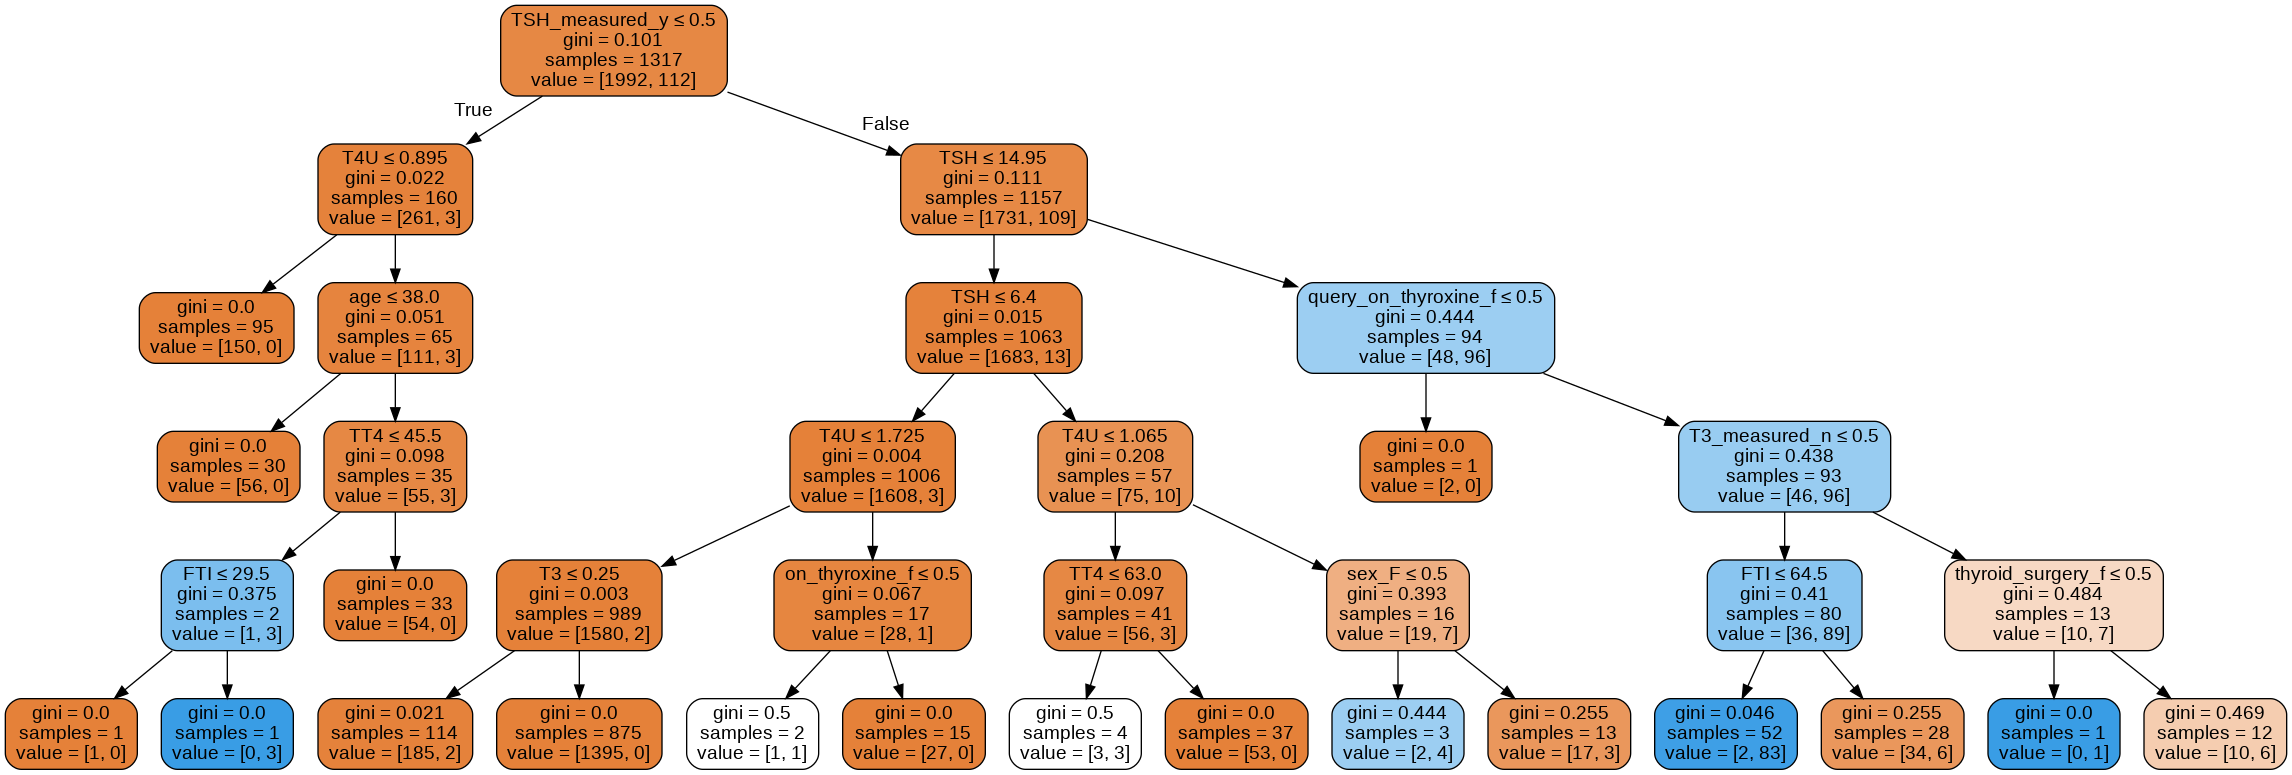

In [ ]:
# visualizating one of the trees from the forests
# importing libraries 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

# picking the 10th tree from the forest
tree = rf.estimators_[10]

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
#Feature importance
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
important_features = pd.DataFrame({'feature': X.columns, 'importance': np.round(rf.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
important_features

,importance
feature,
TSH,0.3227
FTI,0.2976
TT4,0.1734
T4U,0.0368
TSH_measured_n,0.0349
T3,0.0286
age,0.0164
TT4_measured_y,0.0132
TSH_measured_y,0.0125


## b) ADA Boosting 

In [ ]:
# imorting libraries 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# hyperparameter tuning
#Previewing the parameters to tune
AdaBoostClassifier()


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

### hyperperameter tuning

In [ ]:
# Creating a dictionary of parameters to tune
#
params = {'n_estimators': [10, 20, 30, 40,50,60,70,80,90, 100],
         'learning_rate': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=10, shuffle=True)
model = AdaBoostClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'learning_rate': 1, 'n_estimators': 100}


In [ ]:
# defyining the features and labels 

x = data_1.drop('status', axis = 1)
y = np.where(data_1.status == 'hypothyroid', 1, 0)
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
ada = AdaBoostClassifier(learning_rate=1, n_estimators=70, random_state = 0)
ada.fit(X_train, y_train)

# Making predictions
#
y_pred_ada = ada.predict(X_test)

# Measuring the accuracy of the model
#
print('The accuracy score is:', {accuracy_score(y_test, y_pred_ada)} )
print('The f1 score is:', {f1_score(y_test, y_pred_ada)})


The accuracy score is: {0.991140642303433}
The f1 score is: {0.888888888888889}


In [ ]:
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ada))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ada))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)))

Mean Absolute Error: 0.008859357696566999
Mean Squared Error: 0.008859357696566999
Root Mean Squared Error: 0.09412416106700233


The ADABoost model achieved an accuracy of 99% and a low Mean square error of 0.0088 

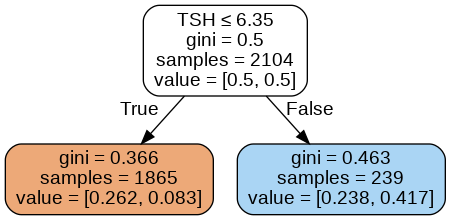

In [ ]:
#visualise tenth stump
dot_data = StringIO()
# pick a specific tree from the forest
tree = ada.estimators_[10]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [ ]:
importantADA = pd.DataFrame({'feature': X.columns, 'importance': ada.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
importantADA


,importance
feature,
TSH,0.328571
FTI,0.185714
age,0.114286
TT4,0.114286
T4U,0.114286
T3,0.057143
on_thyroxine_f,0.042857
on_antithyroid_medication_f,0.028571
sex_F,0.014286


## c) Gradient Boosting 

In [ ]:
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier(n_estimators= 100, learning_rate=0.1, max_depth=3)
gbc = gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)
print('The accuracy score is:', accuracy_score(y_test, y_pred_gbc))

The accuracy score is: 0.991140642303433


### hyperperameter tuning 

In [ ]:
# hyperparameter tuning
#Previewing the parameters to tune
GradientBoostingClassifier()

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gbc = GradientBoostingClassifier(n_estimators= 300, learning_rate=0.7, max_depth=10)
gbc = gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)
print('The accuracy score is:', accuracy_score(y_test, y_pred_gbc))

The accuracy score is: 0.9889258028792912


Increasing the number of trees to 300 without changing the other parameters reduces the accuracy score to 98%

Increasing the learning rate from 0.1 to 0.7 without changing te maxmum depth of the tree increases the accuracy score 

increasing the depth of the tree to 6 reduces the accuraccy which could mean less overfitting of the data 

In [ ]:
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gbc))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gbc))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbc)))

Mean Absolute Error: 0.01107419712070875
Mean Squared Error: 0.01107419712070875
Root Mean Squared Error: 0.10523401123547818


ADABoost model produced the best model with the lowest Mean square error at 0.0088 and an accuracy score of 99%, however such high accuarcy could be caused by high variance and low bias that is overfitting. 

The model also identified the most important and crucial independent features that is TSH , FTI , age , TT4 , T4U , T3 in descendig order.

# Support Vector Machine 

## a) Linear Function 

In [ ]:
# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC

# we will use the top two most important features (independent varibales) as identified from the decion trees above 
# specify the indepebdent and dependent features 
X = data_1[['FTI','TSH']].values
# Put a label of either a negative and assign 0. assign hypothyroid to 1
y = np.where(data_1['status']=='negative',0,1)

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# Fit the model and tainning the model
linearmodel = SVC(kernel= 'linear')
linearmodel.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

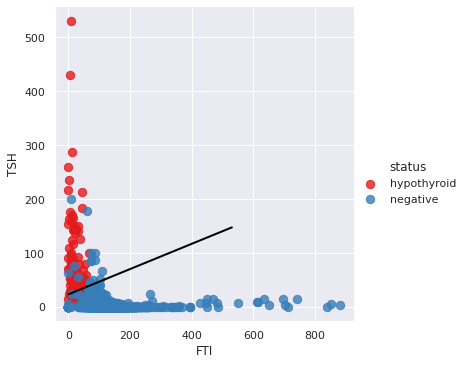

In [ ]:
# Get the separating hyperplane
from sklearn.svm import SVC 
w = linearmodel.coef_[0] #get the first coefficient of our model
a = -w[0] / w[1]
# Get the x values of our hyperplane. We achieve this by creating a range numbers from the largest number of the TSH vlaues and the smallest number of the TSH values.  
xx = np.linspace(0, 530)
yy = a * xx - (linearmodel.intercept_[0]) / w[1]

# Plot the hyperplane
sns.lmplot('FTI', 'TSH', data= data_1, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');


In [ ]:
# Now that we have created our model let's use it to make some more predictions. 
# Remember the output of our model can either be 0 or 1. 0 being the patient is negative and 1 being the patient has hypothyroid as we set it in the type_label variable.
# Predict if 300 parts FT1 and 50 parts TSH
y_pred_lsvm= linearmodel.predict(X_test)
y_pred_lsvm= linearmodel.predict([[300, 50]])
y_pred_lsvm


array([0])

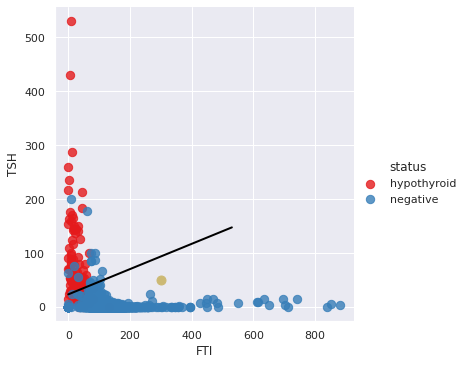

In [ ]:
# Plot the point to visually see where the point lies
sns.lmplot('FTI', 'TSH', data=data_1, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(300, 50, 'yo', markersize='9');

The model has predicted that a patient with 300 FTI and 50 TSH is negative for hypothyroid 

In [ ]:
# assessing the model 
y_pred_lsvm= linearmodel.predict(X_test)
print('The accuracy score is:', accuracy_score(y_test, y_pred_lsvm))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lsvm))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lsvm))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lsvm)))



The accuracy score is: 0.978405315614618
Mean Absolute Error: 0.02159468438538206
Mean Squared Error: 0.02159468438538206
Root Mean Squared Error: 0.1469512993660895


## b) Radial Basis Function 

In [ ]:
# we will use the top two most important features (independent varibales) as identified from the decion trees above 
# specify the indepebdent and dependent features 
from sklearn.svm import SVC,LinearSVC
X = data_1[['FTI','TSH']].values
# Put a label of either a negative and assign 0. assign hypothyroid to 1
y = np.where(data_1['status']=='negative',0,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Building the model 
rbfmodel = SVC(kernel='rbf', degree = 4, gamma = 16)
# Training the model using the training set
rbfmodel.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma=16, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# making prediction
y_pred_rbf = rbfmodel.predict(X_test)

In [ ]:
# assessing the model 

print('The accuracy score is:', accuracy_score(y_test, y_pred_rbf))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rbf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rbf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rbf)))

The accuracy score is: 0.9568106312292359
Mean Absolute Error: 0.04318936877076412
Mean Squared Error: 0.04318936877076412
Root Mean Squared Error: 0.20782052057187259


### hyperparameter tuning 

In [ ]:
# we will use the top two most important features (independent varibales) as identified from the decion trees above 
# specify the indepebdent and dependent features 
from sklearn.svm import SVC,LinearSVC
X = data_1[['FTI','TSH']].values
# Put a label of either a negative and assign 0. assign hypothyroid to 1
y = np.where(data_1['status']=='negative',0,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Building the model 
rbfmodel = SVC(kernel='rbf', degree = 4, gamma = 'scale')
# Training the model using the training set
rbfmodel.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# making prediction
y_pred_rbf = rbfmodel.predict(X_test)

# assessing the tuned model 

print('The accuracy score is:', accuracy_score(y_test, y_pred_rbf))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rbf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rbf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rbf)))



The accuracy score is: 0.9850498338870431
Mean Absolute Error: 0.014950166112956811
Mean Squared Error: 0.014950166112956811
Root Mean Squared Error: 0.12227087189088337


The parameter gamma was tuned from 16 to auto then scale. gamma 16 gives a model of accuracy 95% , auto gives accuracy of 96% a slight imporvement while gamma set to scale gives the best model with an accuracy of 98% and mean square erroe of 0.01. 

## c) Polynomial Function 

Here we will us the dataframe df_data1 whose features have been subjected to feature engineering as done in the PCA. 

In [ ]:
from sklearn.svm import SVC,LinearSVC
X = df_train1.drop(['status'],axis =1
# Put a label of either a negative and assign 0. assign hypothyroid to 1
y = np.where(df_train1['status']=='negative',0,1)

In [ ]:
#  Split the data into train and test set,for every 10 observations 8 will go training the model and 2 testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
polymodel = SVC(kernel = 'poly', degree=3, gamma = 'auto')

In [ ]:
polymodel.fit(x_train, y_train )

In [ ]:
# making prediction
y_pred_poly = polymodel.predict(x_test)
y_pred_poly

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# assessing the model 

print('The accuracy score is:', accuracy_score(y_test, y_pred_poly))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_poly))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_poly))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))

The accuracy score is: 0.9568106312292359
Mean Absolute Error: 0.04318936877076412
Mean Squared Error: 0.04318936877076412
Root Mean Squared Error: 0.20782052057187259


The linear kernel model gave an accuracy of 97% , the RBF model gave an accuracy of 98% while the polynomial model gave an accuracy of 95%. 

It is important to note that the the models created by the linear and rbf kernels only used the two most important features that is FTI and TSH. while the polynomial model used most of the features in the dataset since the two features could not be executed by the polynomial function. 

Moreover we will try using most of the features with the rbf model and compare the accuracy of the models. 

# Applying chosen model to whole dataset features

Using the best performing kernel with most of the features in the dataset and the most optimum parameters

In [ ]:
X = df_train1.drop(['status'], axis= 1).values
# Put a label of either a negative and assign 0. assign hypothyroid to 1
y = np.where(df_train1['status']=='negative',0,1)

#x = pd.get_dummies(x)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
#Using default version
from sklearn.svm import SVC,LinearSVC
classifier_default = SVC(kernel='rbf' , degree = 4 , gamma = 'scale')
classifier_default.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# predict
y_pred_def = classifier_default.predict(X_train)
y_pred = classifier_default.predict(X_test)


In [ ]:
# assessing the default model 

print('The accuracy score is:', accuracy_score(y_test, y_pred_poly))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_poly))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_poly))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))

The accuracy score is: 0.9568106312292359
Mean Absolute Error: 0.04318936877076412
Mean Squared Error: 0.04318936877076412
Root Mean Squared Error: 0.20782052057187259


Using most of the features in the dataset with the radial basis kernel , the model gives an accuracy of 95% much lower than the previous model that used only two features. 

# Challenge the Solution 

From the decision trees the ADA boost model performed the best. This can be challenged by creating a new model with the XGBoost technique and thereafter comparing the accuracy and the mean square error of the models. 

From the Sector vector machine models the rbf kernel with two features( independent variables)  performed the best. This can be challenged by creating a new model with the sigmoid kernel and thereafter comparing the performance of the kernels a fresh. 

Moreover, The feature engineering may also prove as a means to improving model performance for the SVM models. Though limited engineering was carried out here additional research may yield better and more efficient workflows.

# Follow Up Questions 

## a) Did we have the right data

The data provided was sufficient to create calssification models with decison trees. However it is key to note that the polynomial function kernel could not create a model with only two features. The polynomila function model used most of the features in the dataset.  

## b) Did we have the right question 

Yes the question for analysis was correct.
Recall from defining the question, the question for analysis was to get the most iportant features and to create models that can predict if a patient has hypothyroid or not. 

## c) Do we need another data to answer the question 

From the models, it seems that no additional data is required to create a model that predicts hypothyroidism or not in a patient given their symptoms.